<a href="https://colab.research.google.com/github/05-02-utkarsh/CODE-SNIPPETS/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [7]:
data = load_data('AAPL')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.347174,24.817059,23.906238,24.805924,212818400
1,2015-01-05,23.661274,24.195741,23.474212,24.115571,257142000
2,2015-01-06,23.663506,23.924058,23.300513,23.725860,263188400
3,2015-01-07,23.995312,24.095523,23.761482,23.872829,160423600
4,2015-01-08,24.917273,24.975174,24.206877,24.324906,237458000


In [9]:
print(df.columns)


MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [10]:
# Flatten MultiIndex columns to single level
df.columns = [' '.join(col).strip() for col in df.columns.values]

# Now drop the 'Date' and 'Adj Close' columns
df = df.drop(['Date', 'Adj Close'], axis=1, errors='ignore')  # errors='ignore' to avoid errors if columns are not present

# Show the updated dataframe
df.head()


,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL
0,24.347174,24.817059,23.906238,24.805924,212818400
1,23.661274,24.195741,23.474212,24.115571,257142000
2,23.663506,23.924058,23.300513,23.725860,263188400
3,23.995312,24.095523,23.761482,23.872829,160423600
4,24.917273,24.975174,24.206877,24.324906,237458000


Index(['CloseAAPL', 'HighAAPL', 'LowAAPL', 'OpenAAPL', 'VolumeAAPL'], dtype='object')


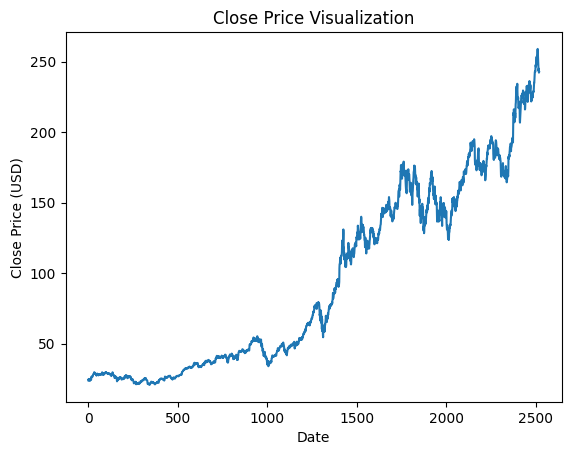

In [15]:
# Flatten MultiIndex columns to single level and remove extra spaces
df.columns = [' '.join(col).strip().replace(' ', '') for col in df.columns.values]

# Check the updated column names
print(df.columns)

# Plot the Close price visualization using the cleaned column name
plt.title("Close Price Visualization")
plt.plot(df['CloseAAPL'])  # Use the cleaned column name without spaces
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()


In [16]:
df

,CloseAAPL,HighAAPL,LowAAPL,OpenAAPL,VolumeAAPL
0,24.347174,24.817059,23.906238,24.805924,212818400
1,23.661274,24.195741,23.474212,24.115571,257142000
2,23.663506,23.924058,23.300513,23.725860,263188400
3,23.995312,24.095523,23.761482,23.872829,160423600
4,24.917273,24.975174,24.206877,24.324906,237458000
...,...,...,...,...,...
2516,243.850006,249.100006,241.820007,248.929993,55740700
2517,243.360001,244.179993,241.889999,243.360001,40244100
2518,245.000000,247.330002,243.199997,244.309998,45045600
2519,242.210007,245.550003,241.350006,242.979996,40856000


# Plotting moving averages of 100 day

---



In [19]:
# Calculate the 100-day moving average for the 'CloseAAPL' column
ma100 = df['CloseAAPL'].rolling(100).mean()

# Display the moving average
print(ma100)


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2516    231.685607
2517    231.946298
2518    232.186029
2519    232.393366
2520    232.575636
Name: CloseAAPL, Length: 2521, dtype: float64


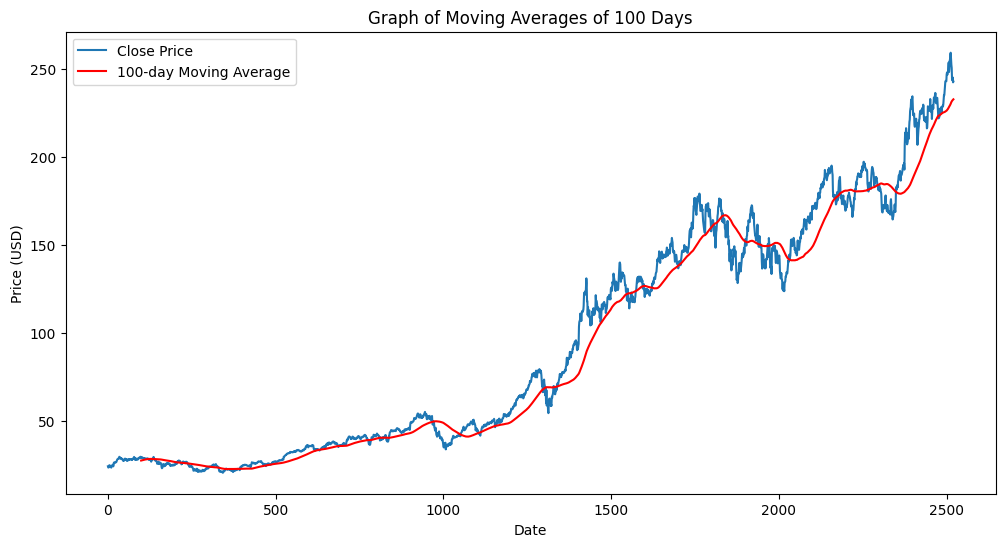

In [21]:
# Plot Close Price and 100-day Moving Average
plt.figure(figsize=(12, 6))
plt.plot(df['CloseAAPL'], label='Close Price')  # Use 'CloseAAPL' instead of 'Close'
plt.plot(ma100, 'r', label='100-day Moving Average')
plt.title('Graph of Moving Averages of 100 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [23]:
# Calculate the 200-day moving average for the 'CloseAAPL' column
ma200 = df['CloseAAPL'].rolling(200).mean()

# Display the moving average
print(ma200)


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2516    213.417230
2517    213.756804
2518    214.091675
2519    214.448964
2520    214.804170
Name: CloseAAPL, Length: 2521, dtype: float64


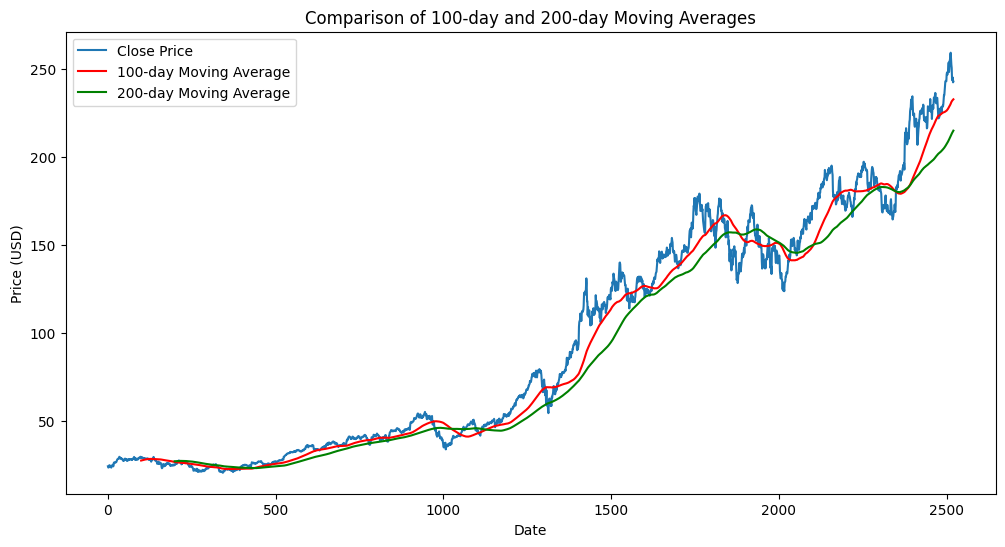

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['CloseAAPL'], label='Close Price')  # Use 'CloseAAPL' instead of 'Close'
plt.plot(ma100, 'r', label='100-day Moving Average')
plt.plot(ma200, 'g', label='200-day Moving Average')
plt.title('Comparison of 100-day and 200-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [26]:
df.shape

(2521, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [27]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1764, 6)
(757, 6)


In [28]:
train.head()

,Date,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL
0,2015-01-02,24.347174,24.817059,23.906238,24.805924,212818400
1,2015-01-05,23.661274,24.195741,23.474212,24.115571,257142000
2,2015-01-06,23.663506,23.924058,23.300513,23.725860,263188400
3,2015-01-07,23.995312,24.095523,23.761482,23.872829,160423600
4,2015-01-08,24.917273,24.975174,24.206877,24.324906,237458000


In [29]:
test.head()

,Date,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL
1764,2022-01-04,176.803802,179.991589,176.233148,179.686588,99310400
1765,2022-01-05,172.100861,177.266248,171.825374,176.715276,94537600
1766,2022-01-06,169.227905,172.474723,168.873707,169.916620,96904000
1767,2022-01-07,169.395172,171.333423,168.273546,170.103569,86709100
1768,2022-01-10,169.414871,169.719873,165.459656,166.354993,106765600


# Using MinMax scaler for normalization of the dataset

---



In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [31]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [32]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.02656753],
       [0.0221866 ],
       [0.01971353],
       ...,
       [0.98969805],
       [0.98108175],
       [0.97945841]])

In [33]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
x_train.shape

(1664, 100, 1)

# ML Model (LSTM)

---



In [35]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

# Initialize the model
model = Sequential()

# First LSTM layer with 50 units
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer with 60 units
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer with 80 units
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer with 120 units
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [40]:
# Normalize the test set using the same scaler as the training data
data_test_array = scaler.transform(test_close)

# Prepare the x_test and y_test datasets
x_test = []
y_test = []

for i in range(100, data_test_array.shape[0]):
    x_test.append(data_test_array[i-100:i])  # 100 previous days
    y_test.append(data_test_array[i, 0])     # The next day's close price

# Convert x_test and y_test to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Check the shape of the test data
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['MAE'])

# Train the model using the training and test datasets
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)


Shape of x_test: (657, 100, 1)
Shape of y_test: (657,)
Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - MAE: 0.1391 - loss: 0.0442 - val_MAE: 0.1563 - val_loss: 0.0297
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - MAE: 0.0515 - loss: 0.0061 - val_MAE: 0.0664 - val_loss: 0.0067
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - MAE: 0.0413 - loss: 0.0043 - val_MAE: 0.0569 - val_loss: 0.0048
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - MAE: 0.0400 - loss: 0.0043 - val_MAE: 0.0821 - val_loss: 0.0094
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - MAE: 0.0405 - loss: 0.0046 - val_MAE: 0.0633 - val_loss: 0.0059
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - MAE: 0.0382 - loss: 0.0038 - val_MAE: 0.0552 - val_loss: 0.0045
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - MAE: 0.0380 - loss: 0.0040 - val_MAE: 0.0825 - val_loss: 0.0096
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - MAE: 0.0375 - loss: 0.0036 - val_MAE: 0.0743 - val_loss: 0.0080
Epoch 9

In [41]:
model.save('keras_model.h5')

In [42]:

test_close.shape
test_close

array([[179.68658798],
       [176.71527556],
       [169.91662049],
       [170.10356924],
       [166.35499349],
       [169.54275807],
       [173.28149147],
       [172.94700873],
       [168.57857166],
       [168.74581702],
       [167.26014726],
       [164.28883562],
       [161.77008037],
       [157.44100875],
       [156.41777008],
       [160.86491051],
       [159.83182343],
       [163.03930297],
       [167.41756867],
       [171.20550151],
       [171.93359808],
       [171.66794061],
       [169.12825935],
       [170.29075803],
       [169.17753062],
       [173.43333486],
       [171.55171756],
       [169.76861022],
       [164.88232229],
       [168.42884528],
       [169.29575883],
       [168.48792617],
       [167.29593388],
       [162.52787973],
       [163.07955725],
       [150.31215927],
       [161.40479782],
       [160.63642237],
       [162.25204311],
       [161.94662102],
       [165.96600453],
       [162.04516938],
       [160.93196544],
       [156

In [43]:
past_100_days = pd.DataFrame(train_close[-100:])

In [44]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [45]:
final_df = past_100_days.append(test_df, ignore_index = True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
final_df.head()

,0
0,81.279999
1,80.580002
2,82.875000
3,83.364998
4,85.997498


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

(727, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(627, 100, 1)
(627,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

20/20 [==============================] - 2s 64ms/step


In [ ]:
y_pred.shape

(627, 1)

In [ ]:
y_test

array([0.33974171, 0.33984032, 0.35512175, 0.30188305, 0.34250222,
       0.27881298, 0.27792563, 0.29439025, 0.33885436, 0.37907917,
       0.37572714, 0.35236124, 0.3489106 , 0.3836143 , 0.38085379,
       0.38134677, 0.39160016, 0.38262842, 0.36922015, 0.37523415,
       0.3624174 , 0.32800946, 0.34102335, 0.34950211, 0.35502314,
       0.37927639, 0.41545896, 0.41900821, 0.41762796, 0.41082521,
       0.42561374, 0.43182489, 0.40619146, 0.42058562, 0.41240269,
       0.40619146, 0.46633145, 0.46564132, 0.47441584, 0.45430351,
       0.46978209, 0.50576759, 0.49669731, 0.50665487, 0.55318944,
       0.53524595, 0.52390815, 0.51375337, 0.48141581, 0.49719014,
       0.45371192, 0.49630287, 0.50744361, 0.47717635, 0.4754018 ,
       0.49600711, 0.4764863 , 0.4590358 , 0.46583854, 0.50724638,
       0.55496399, 0.57665395, 0.61461107, 0.61697729, 0.60613231,
       0.55713298, 0.50655633, 0.52804891, 0.53642914, 0.52607714,
       0.56009072, 0.55387949, 0.55535843, 0.54648523, 0.54037

In [ ]:
y_pred

In [ ]:
scaler.scale_

array([0.00985902])

In [ ]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

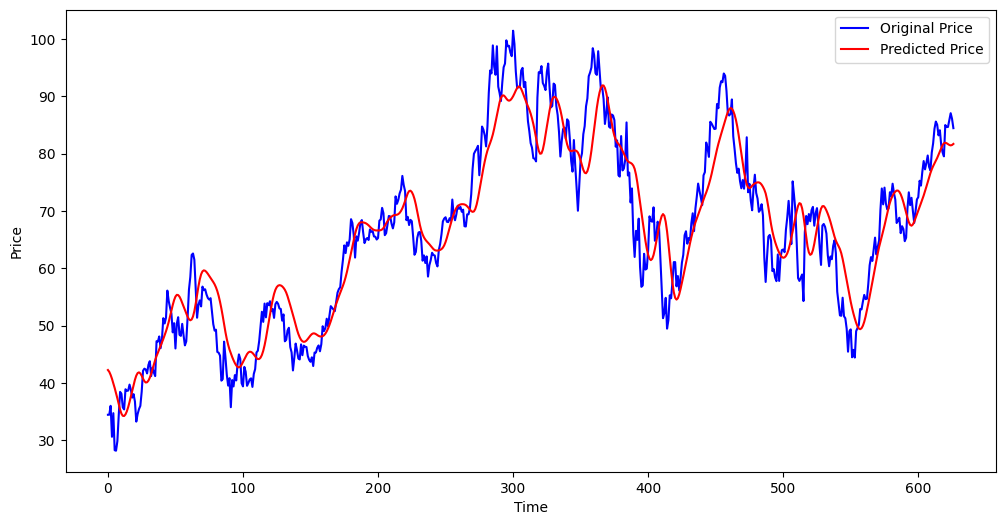

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4.542532119013522
